# plots for paper

In [2]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

from matplotlib.patches import ConnectionPatch

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'
%run 'mask_galaxies.ipynb'

In [3]:
machine='chinook'

### STUFF WE MUST HAVE:
slicewidth = 5.        # initial value
resolution = None      # initial value   # arcsec/pixel
distance   = '100Mpc'  # initial value
data_FOV =None  # from extract_FOV
xystarts =None  # from extract_FOV
size     =None  # from extract_FOV

data_tuple = loaddata(machine=machine, distance=distance, slicewidth=slicewidth)  ### I want this to set the resolution too

### For the full size plots, use low resolution data:
data_tuple_100 = loaddata(machine=machine, distance=distance, slicewidth=slicewidth, resolution=100.)  ### I want this to set the resolution too
#data_tuple = data_tuple_100


Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 5 (after rounding), number of slices is 1
./intermediatedata/data_100Mpc_6arcsec_5slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_5slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 5 (after rounding), number of slices is 1
./intermediatedata/data_100Mpc_100arcsec_5slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_100arcsec_5slwd.npz was saved as a tuple (len(data)==3), so we can return it with the resolution appended.


In [4]:
data = data_tuple[0]
resolution = data_tuple[3]
print data.shape
print resolution

(32000, 32000)
6.40094057981


In [5]:
FOV1_50, xystarts1_50, size1_50    = extractFOV(data_tuple,  resolution, '50Mpc', x_center = 50.5, y_center = 13.5)
FOV1_100, xystarts1_100, size1_100 = extractFOV(data_tuple,  resolution, '100Mpc', x_center = 50.5, y_center = 13.5)
FOV1_200, xystarts1_200, size1_200 = extractFOV(data_tuple,  resolution, '200Mpc', x_center = 50.5, y_center = 13.5)
FOV1_500, xystarts1_500, size1_500 = extractFOV(data_tuple,  resolution, '500Mpc', x_center = 50.5, y_center = 13.5)


In [6]:
def plotcutout(data,minx,miny,size):
    shape = data.shape[0]
    data_cutout = data[int(minx/100.*shape):int((minx+size)/100.*shape),int(miny/100.*shape):int((miny+size)/100.*shape)]
    return data_cutout

def plotbox(minx,miny,sizex,sizey,ax,colour='black',linewidth=1,linestyle='-'):
    ax.plot([minx,minx+sizex,minx+sizex,minx,minx],[miny,miny,miny+sizey,miny+sizey,miny],\
            linestyle=linestyle,color=colour,linewidth=linewidth)


## full simulation with FOV inset figure

The type of size is <type 'int'>
The type of size is <type 'list'>


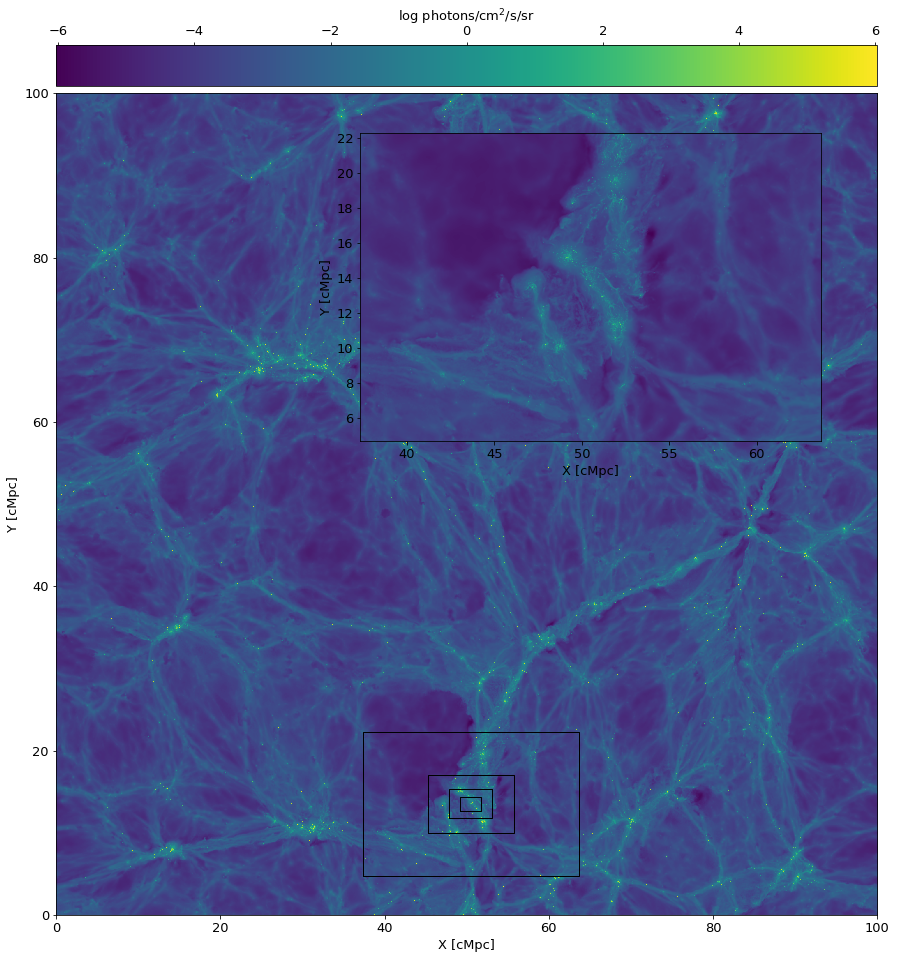

In [7]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 16))
get_halpha_SB.makemap(data_tuple_100[0],100,ax1,xystarts = [0,0])
plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax1)
plotbox(xystarts1_100[0],xystarts1_100[1],size1_100[0],size1_100[1],ax1)
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax1)
plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax1)

ax2 = fig.add_axes([0.42, 0.47, 0.40, 0.40])
get_halpha_SB.makemap(FOV1_500,size1_500,ax2,xystarts=xystarts1_500,colorbar=False)

#plt.tight_layout()

## dragonfly FOVs outlined + filament Figure

The type of size is <type 'list'>


(4.71875, 22.28125)

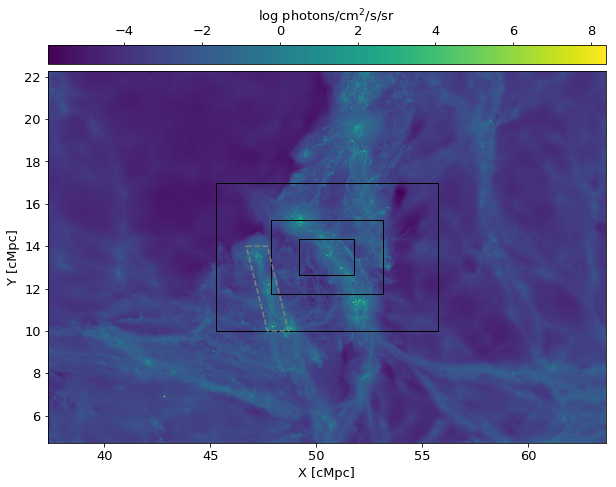

In [8]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
get_halpha_SB.makemap(FOV1_500,size1_500,ax1,xystarts = xystarts1_500)

## plot FOVs
plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax1)
plotbox(xystarts1_100[0],xystarts1_100[1],size1_100[0],size1_100[1],ax1)
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax1)

## plot filament box
ax1.plot(np.array([46.2,47.2,48.2,47.2,46.2])+0.5,[14,14,10,10,14],color='grey',label='Region 1',linestyle='--')

ax1.set_xlim(xystarts1_500[0],xystarts1_500[0]+size1_500[0])
ax1.set_ylim(xystarts1_500[1],xystarts1_500[1]+size1_500[1])

## dragonfly full simulation + FOV figure on the side + filament

The type of size is <type 'int'>
(37.328125, 22.28125)
(63.671875, 4.71875)


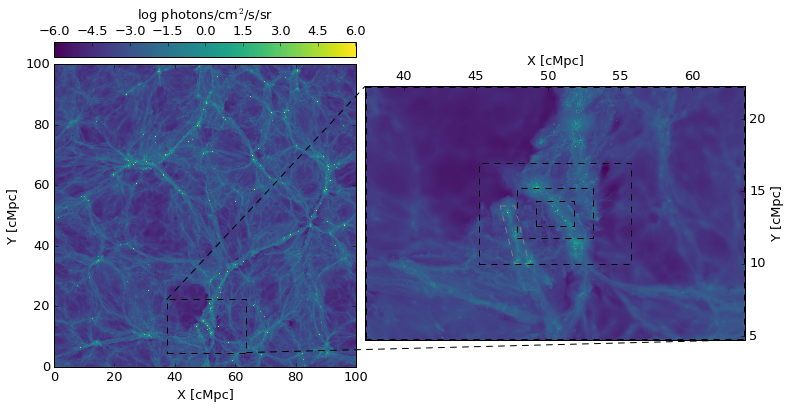

In [9]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.4])

get_halpha_SB.makemap(data_tuple_100[0],100,ax1,xystarts = [0,0])
plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax1,linestyle='--')

ax2 = fig.add_axes([0.46, 0.07, 0.44, 0.44])
pltimg(FOV1_500,ax2,xystarts1_500,size1_500,colorbar=False,labelaxes=True,ylabelside='right')
## plot FOVs
plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax2,linestyle='--')
plotbox(xystarts1_100[0],xystarts1_100[1],size1_100[0],size1_100[1],ax2,linestyle='--')
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax2,linestyle='--')
plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax2,linestyle='--',linewidth=3)
ax2.set_xlim(xystarts1_500[0],xystarts1_500[0]+size1_500[0])
ax2.set_ylim(xystarts1_500[1],xystarts1_500[1]+size1_500[1])
## plot filament box
ax2.plot(np.array([46.2,47.2,48.2,47.2,46.2])+0.5,[14,14,10,10,14],color='grey',label='Region 1',linestyle='--',linewidth=1)

xy1 = (xystarts1_500[0],xystarts1_500[1]+size1_500[1])
xy2 = (xystarts1_500[0]+size1_500[0],xystarts1_500[1])
print xy1
print xy2
con1 = ConnectionPatch(xyA=xy1, xyB=xy1, coordsA="data", coordsB="data",
                       axesA=ax1, axesB=ax2, color="black",linestyle='--')
ax1.add_artist(con1)
con2 = ConnectionPatch(xyA=xy2, xyB=xy2, coordsA="data", coordsB="data",
                       axesA=ax1, axesB=ax2, color="black",linestyle='--')
ax1.add_artist(con2)

plt.savefig('extract_FOV_and_cutout_galaxies_fullsimFOVs.png')

## dragonfly 50 Mpc FOV with galaxy cutouts Figure

In [19]:
def makemap(data,size,ax,Vmin = None,Vmax = None,colmap='viridis',xystarts = [0.,0.],title = '',colorbar=True,mockobs=False,labelaxes=True,label=''):
    fontsize=13
    #xystarts = [0.,0.] # lower left origin of the plot
    
    if mockobs:
        clabel = r'log signal (photons)'
    else:
        clabel = r'log photons/cm$^2$/s/sr'
    
    if type(size) == float or type(size) == int:
        print('The type of size is '+str(type(size)))
        xsize = size
        ysize = size
    else:
        print('The type of size is '+str(type(size)))
        xsize = size[0]
        ysize = size[1]
    
    #fig = plt.figure(figsize = (5.5, 5.)) # large size just as a trick to get higher resolution
    #fig = plt.figure(figsize = (11., 10.))
    
    if labelaxes:
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
        ax.xaxis.set_label_position('bottom') 
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    
    colmap = 'viridis' #'afmhot'
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    
    # nearest neighbour interpolation does not do any averaging, it just picks the nearest point and uses that as the value for a specific section in the image
    img = ax.imshow(data.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower', \
                    cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
    
    #plt.title(label,fontsize=fontsize)
    div = axgrid.make_axes_locatable(ax)
        
    if colorbar:
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')

        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.xaxis.set_label_position('top')      
        cbar.ax.xaxis.set_ticks_position('top')
        cbar.solids.set_edgecolor("face")
        #cbar.ax.set_ylabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
    
    font = {'family': 'serif',
        'color':  'yellow',
        'weight': 'bold',
        'size': 12,
        }
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }


def plotgalboxes(xgal,ygal,rhgas,rhstar,mgal,ax1,boxsize=0.4,linestyle='-'):
    for i in range(len(xgal)):
        if mgal[i]>10**9:
            minx,miny,sizex,sizey = xgal[i]-boxsize/2.,ygal[i]-boxsize/2.,boxsize,boxsize
            plotbox(minx,miny,sizex,sizey,ax1,colour='grey',linestyle=linestyle)

def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,ylabelside='left'):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest',vmin=-4.5,vmax=8)
    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
        ax.xaxis.set_label_position('top') 
        ax.xaxis.tick_top()
        if ylabelside=='right':
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)

def putinbounds(xy):
    x,y = xy
    if x>xystarts1_50[0]+size1_50[0]:
        print 'setting x (%s) to %s since too large'%(x,xystarts1_50[0]+size1_50[0])
        x = xystarts1_50[0]+size1_50[0]
    if x<xystarts1_50[0]:
        print 'setting x (%s) to %s since too small'%(x,xystarts1_50[0])
        x = xystarts1_50[0]
    if y>xystarts1_50[1]+size1_50[1]:
        print 'setting y (%s) to %s since too large'%(y,xystarts1_50[1]+size1_50[1])
        y = xystarts1_50[1]+size1_50[1]
    if y<xystarts1_50[1]:
        print 'setting y (%s) to %s since too small'%(y,xystarts1_50[1]+size1_50[1])
        y = xystarts1_50[1]
    return (x,y)

In [41]:
### grab out the galaxies inside this FOV
xmin,xmax,ymin,ymax,zmin,zmax = xystarts1_50[0],xystarts1_50[0]+size1_50[0],xystarts1_50[1],xystarts1_50[1]+size1_50[1],10.,15.
xgal_50,ygal_50,zgal_50,mgal_50,rhgas_50,rhstar_50 = searchgals(xmin,xmax,ymin,ymax,zmin,zmax,False,False) # from mask_galaxies

## grab the more massive galaxies
Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution         # at 100 Mpc from us
condition_9andup = np.array( (mgal_50 > 10**9) & (rhstar_50*5. > (Mpcperpix*1000.)) & (rhgas_50*5. > (Mpcperpix*1000.)) )
ii_9andup = np.array(np.where(condition_9andup)[0]) 
xgal_9andup     = np.array(xgal_50[ii_9andup])
ygal_9andup     = np.array(ygal_50[ii_9andup])
mgal_9andup     = np.array(mgal_50[ii_9andup])
rhstar_9andup   = np.array(rhstar_50[ii_9andup])
rhgas_9andup    = np.array(rhgas_50[ii_9andup])
print len(xgal_9andup)
# sort by position
sortedindices = np.argsort(xgal_9andup) # np.flipud(...)
xgal_9andup     = xgal_9andup[sortedindices]
ygal_9andup     = ygal_9andup[sortedindices]
mgal_9andup     = mgal_9andup[sortedindices]
rhstar_9andup   = rhstar_9andup[sortedindices]
rhgas_9andup    = rhgas_9andup[sortedindices]

6


In [47]:
data = data_tuple[0]; xsize = data.shape[0]; ysize = data.shape[1]
print data.shape
boxsize = 0.2

(32000, 32000)


The type of size is <type 'list'>


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


setting y (14.4326339722) to 14.3625 since too large
setting y (14.4266563416) to 14.3625 since too large


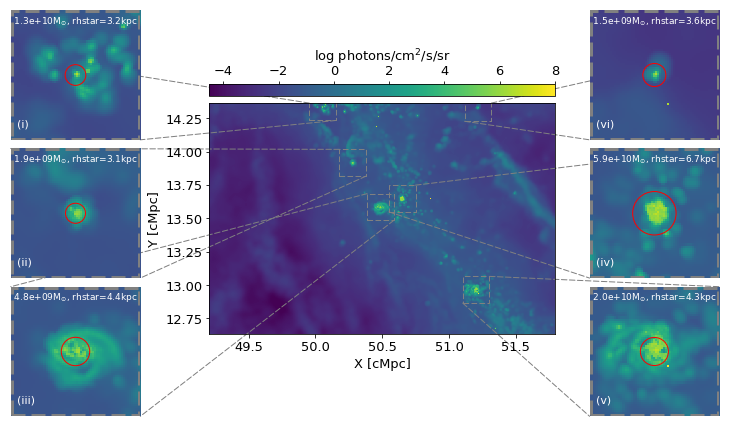

In [43]:
# rect [left, bottom, width, height]
# fig.add_axes(rect)
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_axes([0.37, 0.12, 0.40, 0.5])

#### plot main map
makemap(FOV1_50,size1_50,ax1,xystarts = xystarts1_50,Vmin=-4.5,Vmax=8)

axessize = 0.15
axesbottom = 0.13
spacing = 0.16
axesleft = 0.14 #0.1
axesright= 0.81 #0.85
ax2 = fig.add_axes([axesleft, axesbottom+2*spacing, axessize, axessize])
ax3 = fig.add_axes([axesleft, axesbottom+spacing, axessize, axessize])
ax4 = fig.add_axes([axesleft, axesbottom, axessize, axessize])

ax7 = fig.add_axes([axesright, axesbottom+2*spacing, axessize, axessize])
ax5 = fig.add_axes([axesright, axesbottom+spacing, axessize, axessize])
ax6 = fig.add_axes([axesright, axesbottom, axessize, axessize])

ax1.set_xlim(xystarts1_50[0],xystarts1_50[0]+size1_50[0])
ax1.set_ylim(xystarts1_50[1],xystarts1_50[1]+size1_50[1])

#### plot boxes around large galaxies
plotgalboxes(xgal_50,ygal_50,rhgas_50,rhstar_50,mgal_50,ax1,boxsize=boxsize,linestyle='--')

#### plot cutouts of the more massive galaxies inside this FOV
for j,ax,num in zip(range(6),[ax2,ax3,ax4,ax5,ax6,ax7],['(i)','(ii)','(iii)','(iv)','(v)','(vi)']):
    minx,miny,maxx,maxy = xgal_9andup[j]-boxsize/2.,ygal_9andup[j]-boxsize/2.,xgal_9andup[j]+boxsize/2.,ygal_9andup[j]+boxsize/2.
    xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
    data_tiny=data[minx*xsize/100.:maxx*xsize/100.,miny*ysize/100.:maxy*ysize/100.]
    
    pltimg(data_tiny,ax,xystarts_tiny,size_tiny,colorbar=False,labelaxes=False,\
           label=r' %.1eM$_{\odot}$, rhstar=%.1fkpc'%((mgal_9andup[j]),rhstar_9andup[j]))

    ax.text(0.05,0.1,num,transform=ax.transAxes,color='white',fontsize=11)
    
    ax.set_xlim(minx,maxx)
    ax.set_ylim(miny,maxy)
    ax.set_axis_off()
    
    circle1 = plt.Circle((xgal_9andup[j],ygal_9andup[j]), \
                         radius=rhstar_9andup[j]/1000., color='maroon',fill=False)
  #  ax.add_artist(circle1)
    
    circle1 = plt.Circle((xgal_9andup[j],ygal_9andup[j]), \
                         radius=rhstar_9andup[j]/1000.*5., color='red',fill=False)
    ax.add_artist(circle1)
    
    xy1=(maxx,miny)
    xy2=(minx,maxy)
    if (ax==ax5) or (ax==ax6) or (ax==ax7):
        xy1=(minx,miny)
        xy2=(maxx,maxy)
    xy1 = putinbounds(xy1)
    xy2 = putinbounds(xy2)

    con1 = ConnectionPatch(xyA=xy1, xyB=xy1, coordsA="data", coordsB="data",
                           axesA=ax1, axesB=ax, color="grey",linestyle='--')
    con2 = ConnectionPatch(xyA=xy2, xyB=xy2, coordsA="data", coordsB="data",
                           axesA=ax1, axesB=ax, color="grey",linestyle='--')
    ax1.add_artist(con1)
    ax1.add_artist(con2)
    
    plotbox(minx,miny,boxsize,boxsize,ax,colour='grey',linewidth=5,linestyle='--')
    
plt.savefig('extract_FOV_and_cutout_galaxies_FOVwithgalaxies.png')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


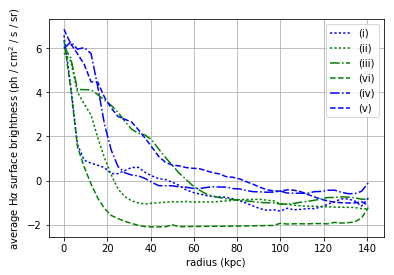

In [92]:
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution         # at 100 Mpc from us
kpcperpix = 0.477/1000.*(1.+0.0235) * resolution * 1000. # at 100 Mpc from us

num=['(i)','(ii)','(iii)','(iv)','(v)','(vi)']
linestyles=[':',':','-.','--','-.','--']
colours=['blue','green','green','green','blue','blue']
for j,linestyle,colour in zip([0,1,2,5,3,4],linestyles,colours):
    minx,miny,maxx,maxy = xgal_9andup[j]-boxsize/2.,ygal_9andup[j]-boxsize/2.,xgal_9andup[j]+boxsize/2.,ygal_9andup[j]+boxsize/2.
    xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
    data_tiny=data[minx*xsize/100.:maxx*xsize/100.,miny*ysize/100.:maxy*ysize/100.]
    
    center, radi = (data_tiny.shape[0]/2,data_tiny.shape[1]/2), 55
    rad = radial_profile(data_tiny, center)

    label=r'%s: %.1eM$_{\odot}$, rhstar=%.1fkpc'%(num[j],mgal_9andup[j],rhstar_9andup[j])
    label='%s'%num[j]
    plt.plot(np.arange(len(rad))*kpcperpix,rad,label=label,color=colour,linestyle=linestyle)
    
plt.xlabel('radius (kpc)')    
# Add profile from van de Voort
# Add observed profile from literature
plt.ylabel(r'average H$\alpha$ surface brightness (ph / cm$^2$ / s / sr)')

plt.legend()
plt.grid()
plt.savefig('extract_FOV_and_cutout_galaxies_individualhalphaprofiles.png')

In [72]:
%run 'mask_galaxies.ipynb'

In [36]:
verbose=True
xmin=0;xmax=100;ymin=0;ymax=100;zmin=10;zmax=15
xgal,ygal,zgal,mgal,rhgas,rhstar = searchgals(xmin,xmax,ymin,ymax,zmin,zmax,True,False) # from mask_galaxies

SELECT                 SH.GalaxyID,                 SH.StarFormationRate as SFR,                 SH.CentreOfPotential_x,                 SH.CentreOfPotential_y,                 SH.CentreOfPotential_z,                 SH.SubGroupNumber,                 SH.MassType_Star,                 SH.HalfMassProjRad_Gas,                 SH.HalfMassProjRad_Star             FROM                 RefL0100N1504_SubHalo as SH             WHERE                 SH.SnapNum = 28 and                 SH.CentreOfPotential_x >= 0 and                 SH.CentreOfPotential_x <= 100 and                 SH.CentreOfPotential_y >= 0 and                 SH.CentreOfPotential_y <= 100 and                 SH.CentreOfPotential_z >= 10 and                 SH.CentreOfPotential_z <= 15 and                 SH.MassType_Star > 0 


In [46]:
Mpcperpix = 0.477/1000.*(1.+0.0235) * 6.4
        
# Condition (use bitwise "&" and not boolean "and")
condition_10andup_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                 (rhgas*5. > (Mpcperpix*1000.)) &
                                 (mgal > 10**10) 
                            )
condition_9andup_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                 (rhgas*5. > (Mpcperpix*1000.)) &
                                 (mgal > 10**9) 
                            )
ii_10andup_all = np.array(np.where(condition_10andup_all)[0]) 
ii_9andup_all = np.array(np.where(condition_9andup_all)[0]) 

xgal_10andup_all      = np.array(xgal[ii_10andup_all])
ygal_10andup_all      = np.array(ygal[ii_10andup_all])
mgal_10andup_all      = np.array(mgal[ii_10andup_all])
rhstar_10andup_all    = np.array(rhstar[ii_10andup_all])
print len(ygal_10andup_all )
xgal_9andup_all      = np.array(xgal[ii_9andup_all])
ygal_9andup_all      = np.array(ygal[ii_9andup_all])
mgal_9andup_all      = np.array(mgal[ii_9andup_all])
rhstar_9andup_all    = np.array(rhstar[ii_9andup_all])
print len(ygal_9andup_all )

171
521


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The length of the profile (x,y=49.5541000366,0.0777019932866) is not correct, length: 0
The length of the profile (x,y=51.2947463989,0.0101769147441) is not correct, length: 0
The length of the profile (x,y=62.0111694336,99.9482650757) is not correct, length: 51


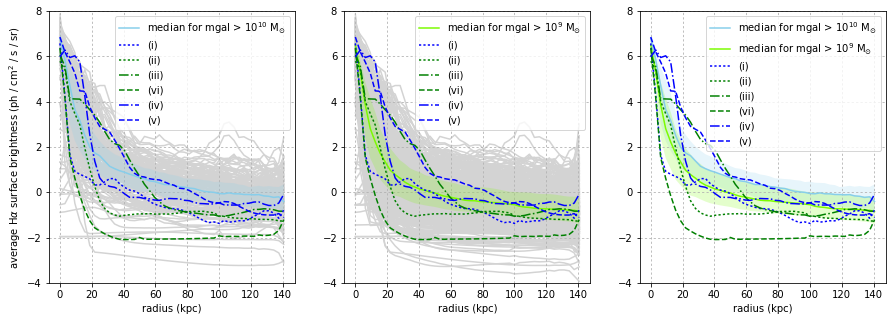

In [88]:
tenandup  = False
nineandup = True
boxsize = 0.2
Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution # 100 Mpc away from us
kpcperpix = 0.477/1000.*(1.+0.0235) * resolution * 1000. # 100 Mpc away from us

def Halphaprofileplot(data,xgal,ygal,boxsize,color='black',ax1=None,label='median',method='median',title = ''):
    """
    Input:  data:  Full simulation data (100Mpc box size) from which will measure the radial Halpha profiles
            xgal,ygal: Locations of galaxies from the galaxy catalogue
    """
    if ax1 is None:
        f, (ax1) = plt.subplots(1, 1,figsize=(5,5))
        
    data = data_tuple[0]; xsize = data.shape[0]; ysize = data.shape[1]

    azprofiles=[]; length = len(ygal); title=title
    ax1.set_title(title)
    radius = np.arange(46) * kpcperpix

    for j in range(length):
        minx,miny,maxx,maxy = xgal[j]-boxsize/2.,ygal[j]-boxsize/2.,xgal[j]+boxsize/2.,ygal[j]+boxsize/2.
        xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
        data_tiny=data[minx*xsize/100.:maxx*xsize/100.,miny*ysize/100.:maxy*ysize/100.]
        center, radi = (data_tiny.shape[0]/2,data_tiny.shape[1]/2), 55
        rad = radial_profile(data_tiny, center)
        if len(rad)==46:
            azprofiles.append(rad)
            if method=='none':
                ax1.plot(radius,rad)
            else:
                ax1.plot(radius,rad,color='lightgrey',zorder=1)
        else:
            'catch edge cases'
            print "The length of the profile (x,y=%s,%s) is not correct, length: %s"%\
                        (minx+boxsize/2,miny+boxsize/2,len(rad))

    azprofiles = np.array(azprofiles)
    
    ax1.set_ylim(-4,8)
    ax1.set_xlabel('radius (kpc)')
    
    if method=='average':
        meanprofile = np.log10(np.mean(10**(azprofiles), axis=0))
        sigmaprofile = np.log10(np.std(10**(azprofiles), axis=0))
        lowerr  = np.log10( 10**meanprofile - (10**sigmaprofile) ) 
        higherr = np.log10( 10**meanprofile + (10**sigmaprofile) ) 
        ax1.plot(radius,lowerr,color=color,linestyle='--')
        ax1.plot(radius,higherr,color=color,linestyle='--')
        ax1.plot(radius,meanprofile,color=color,linestyle='-') 
        return meanprofile,lowerr,higherr
    if method=='median':
        medianprofile = np.log10(np.median(10**(azprofiles), axis=0))
        p25profile = np.percentile(azprofiles, 25, axis=0)
        p75profile = np.percentile(azprofiles, 75, axis=0)
        ax1.plot(radius,medianprofile,color=color,linestyle='-',label=label,zorder=3) 
      #  ax1.plot(radius,p25profile,color=color,linestyle='--',label='25 percentile') 
      #  ax1.plot(radius,p75profile,color=color,linestyle='--',label='75 percentile') 
        ax1.fill_between(radius,p25profile, p75profile, facecolor =color,alpha=0.2,zorder=4)
        return medianprofile,p25profile,p75profile

def plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=None,color10='blue',color9='green'):
    if ax1 is None:
        f, (ax1) = plt.subplots(1, 1,figsize=(5,5))

    num=['(i)','(ii)','(iii)','(iv)','(v)','(vi)']
    linestyles=[':',':','-.','--','-.','--']
    colours=[color10,color9,color9,color9,color10,color10]
    for j,linestyle,colour in zip([0,1,2,5,3,4],linestyles,colours):
        minx,miny,maxx,maxy = xgal_9andup[j]-boxsize/2.,ygal_9andup[j]-boxsize/2.,xgal_9andup[j]+boxsize/2.,ygal_9andup[j]+boxsize/2.
        xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
        data_tiny=data[minx*xsize/100.:maxx*xsize/100.,miny*ysize/100.:maxy*ysize/100.]
    
        center, radi = (data_tiny.shape[0]/2,data_tiny.shape[1]/2), 55
        rad = radial_profile(data_tiny, center)

        label=r'%s: %.1eM$_{\odot}$, rhstar=%.1fkpc'%(num[j],mgal_9andup[j],rhstar_9andup[j])
        label='%s'%num[j]
        
        ax1.plot(np.arange(len(rad))*kpcperpix,rad,label=label,color=colour,linestyle=linestyle,zorder=4)

f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))
ax1.grid(linestyle=':')
median_10andup,p25_10andup,p75_10andup=Halphaprofileplot(data,xgal_10andup_all,ygal_10andup_all,boxsize,ax1=ax1,\
                                                         color='skyblue',\
                                                         label = r'median for mgal > 10$^{10}$ M$_{\odot}$')
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax1)
ax1.legend()
ax1.set_ylabel(r'average H$\alpha$ surface brightness (ph / cm$^2$ / s / sr)')

ax2.grid(linestyle=':')
median_9andup,p25_9andup,p75_9andup=Halphaprofileplot(data,xgal_9andup_all,ygal_9andup_all,boxsize,ax1=ax2,\
                                                      color='lawngreen',\
                                                      label = r'median for mgal > 10$^9$ M$_{\odot}$')
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax2)
ax2.legend()

radius = np.arange(46) * kpcperpix
ax3.plot(radius,median_10andup,color='skyblue',label = r'median for mgal > 10$^{10}$ M$_{\odot}$')
ax3.plot(radius, median_9andup,color='lawngreen',label=r'median for mgal > 10$^9$ M$_{\odot}$')
ax3.fill_between(radius,p25_10andup,p75_10andup,facecolor ='skyblue', alpha=0.2)
ax3.fill_between(radius,p25_9andup, p75_9andup, facecolor ='lawngreen',alpha=0.2)
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax3)
ax3.set_ylim(-4,8)
ax3.set_xlabel('radius (kpc)')
ax3.grid(linestyle=':')
ax3.legend()


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The length of the profile (x,y=49.5541000366,0.0777019932866) is not correct, length: 0
The length of the profile (x,y=51.2947463989,0.0101769147441) is not correct, length: 0
The length of the profile (x,y=62.0111694336,99.9482650757) is not correct, length: 51


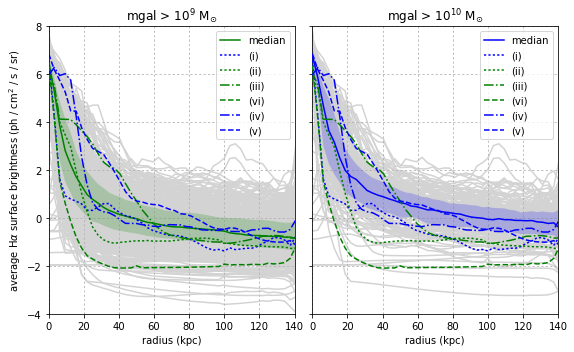

In [100]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(8,5))
ax2.grid(linestyle=':')
median_10andup,p25_10andup,p75_10andup=Halphaprofileplot(data,xgal_10andup_all,ygal_10andup_all,boxsize,ax1=ax2,\
                                                         color='blue',\
                                                         label = 'median')
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax2)
title = r'mgal > 10$^{10}$ M$_{\odot}$'
ax2.legend(loc=1)
ax2.set_title(title)

ax1.grid(linestyle=':')
median_9andup,p25_9andup,p75_9andup=Halphaprofileplot(data,xgal_9andup_all,ygal_9andup_all,boxsize,ax1=ax1,\
                                                      color='green',\
                                                      label='median')
title = r'mgal > 10$^9$ M$_{\odot}$'
plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax1)
ax1.legend(loc=1)
ax1.set_title(title)

ax2.set_yticklabels([])
ax2.set_ylabel('')
#ax2.set_yticks([])

ax1.set_xlim(0,140)
ax2.set_xlim(0,140)
ax1.set_ylabel(r'average H$\alpha$ surface brightness (ph / cm$^2$ / s / sr)')

fig.subplots_adjust( wspace = 0, top=.85)
plt.tight_layout()
plt.savefig('extract_FOV_and_cutout_galaxies_halphaprofiles.png')

37.328125 63.671875 4.71875 22.28125 10.0 15.0


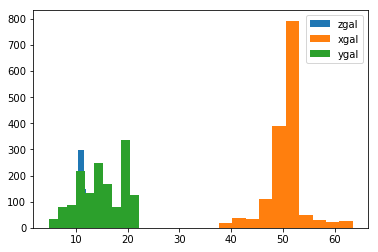

In [75]:
#xmin,xmax,ymin,ymax,zmin,zmax = xystarts1_500[0],xystarts1_500[0]+size1_500[0],xystarts1_500[1],xystarts1_500[1]+size1_500[1],10.,15.
#xgal,ygal,zgal,mgal,rhgas,rhstar = searchgals(xmin,xmax,ymin,ymax,zmin,zmax,True,False) # from mask_galaxies

plt.hist(zgal,label='zgal')
plt.hist(xgal,label='xgal')
plt.hist(ygal,label='ygal')
plt.legend()

print xmin,xmax,ymin,ymax,zmin,zmax

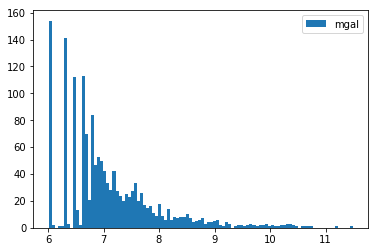

In [81]:
plt.hist(np.log10(mgal),label='mgal',bins=100);
plt.legend()

In [82]:
#Mpcperpix = 0.237/1000.*(1.+0.0115) * resolution
Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution

# Condition (use bitwise "&" and not boolean "and")
condition_8to9 = np.array(   
                              (mgal > 10**8) & (mgal < 10**9)
                         )
condition_9to10 = np.array(  
                               (mgal > 10**9) & (mgal < 10**10)
                          )
condition_10andup = np.array(    
                                 (mgal > 10**10) 
                            )
ii_8to9 = np.array(np.where(condition_8to9)[0]) 
ii_9to10 = np.array(np.where(condition_9to10)[0]) 
ii_10andup = np.array(np.where(condition_10andup)[0]) 

In [83]:
print len(ii_8to9), len(ii_9to10), len(ii_10andup)
xgal_10andup     = np.array(xgal[ii_10andup])
ygal_10andup     = np.array(ygal[ii_10andup])
mgal_10andup     = np.array(mgal[ii_10andup])
rhstar_10andup   = np.array(rhstar[ii_10andup])
sfr_10andup      = np.array(sfr[ii_10andup])
len(ygal_10andup)

134 39 23


23

In [84]:
len(xgal)

1505

The type of size is <type 'list'>


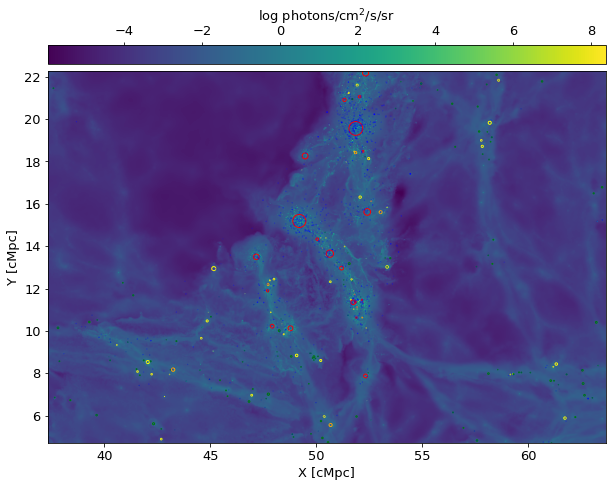

In [85]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
get_halpha_SB.makemap(FOV1_500,size1_500,ax1,xystarts = xystarts1_500)

def plotgals(xgal,ygal,rhgas,rhstar,mgal,ax1,verbose):
    for i in range(len(xgal)):
        colour = 'green'
        if mgal[i]>10**8:
            colour = 'yellow'
        if mgal[i]>10**9:
            colour = 'orange'
        if mgal[i]>10**10:
            colour = 'red'
        circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhgas[i]/1000., color=colour,fill=False)
        ax1.add_artist(circle1)
        circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhstar[i]/1000., color='blue',fill=False)
        ax1.add_artist(circle1)
       # if verbose:
       #     Mpcperpix = 0.237/1000.*(1.+0.0115) * 100.
       #     Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution 
       #     if (rhstar[i]*5.) > (Mpcperpix*1000.) and (rhgas[i]*5.) > (Mpcperpix*1000.):
       #         print("5*rhstar, %.1f, is greater than %s kpc, and has galaxy mass of %s, and a 5*rhgas of %.1f."%\
       #               ((rhstar[i]*5.),(Mpcperpix*1000.),mgal[i],(rhgas[i]*5.)))
       #         circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhstar[i]/1000.*5., color='purple',fill=False)
       #         ax1.add_artist(circle1)

plotgals(xgal,ygal,rhgas,rhstar,mgal,ax1,verbose)

In [86]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis'):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest')
    div = axgrid.make_axes_locatable(ax)
    cax = div.append_axes("top",size="5%",pad=0.1)
    cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white')


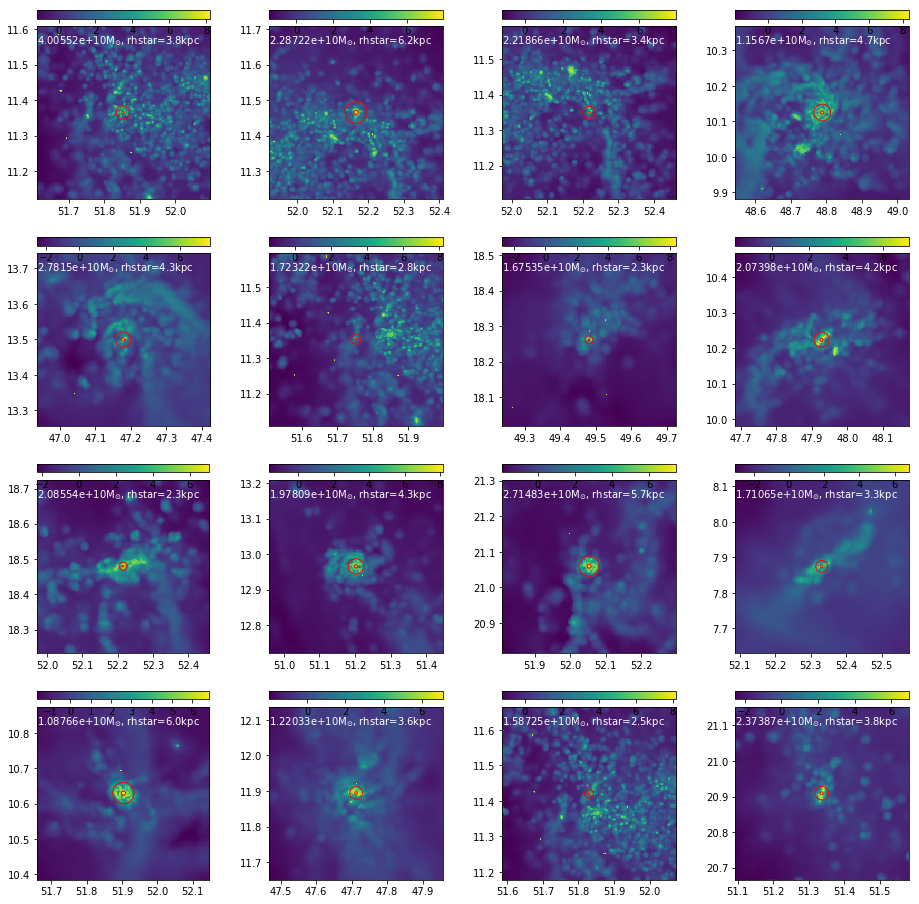

In [87]:
f, axarr = plt.subplots(4, 4,figsize=(16,16))

for j in range(16):
    data_tiny, xystarts_tiny, size_tiny = extractFOV(data_tuple,resolution,distance,\
                                                     x_center=xgal_10andup[j],y_center=ygal_10andup[j],\
                                                     x_angFOV=1000.,y_angFOV=1000.)
    pltimg(data_tiny,axarr[j/4,j%4],xystarts_tiny,size_tiny,\
           label=r'%sM$_{\odot}$, rhstar=%.1fkpc'%(mgal_10andup[j],rhstar_10andup[j]))
    
    circle1 = plt.Circle((xgal_10andup[j],ygal_10andup[j]), radius=rhstar_10andup[j]/1000., color='red',fill=False)
    axarr[j/4,j%4].add_artist(circle1)
    
    circle1 = plt.Circle((xgal_10andup[j],ygal_10andup[j]), radius=rhstar_10andup[j]/1000.*5., color='red',fill=False)
    axarr[j/4,j%4].add_artist(circle1)
